
# 💾 Данные
Берем данные из [кэгла](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
!pip install -q hvplot

# 📤 Импортируем либы

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

 ## Данные с которыми работаем: https://www.kaggle.com/code/ryanholbrook/feature-engineering-for-house-prices/

## 💾 Смотрим дату

In [3]:
sample = pd.read_csv('/content/sample_submission.csv')
df = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 📊 EDA



In [6]:
df.hvplot.hist("SalePrice")

:Histogram   [SalePrice]   (Count)

#Обработка перед обучением


###Категории
**Label Encoding** просто присваивает каждой категории число, что может быть удобно для упорядоченных данных, но нежелательно для неупорядоченных.  
**One-Hot Encoding** превращает каждую категорию в отдельный бинарный признак, что устраняет ложный порядок, но увеличивает размерность данных.
###Числовые признаки
**Масштабирование (scaling)** – это процесс преобразования числовых признаков таким образом, чтобы они находились в схожем диапазоне или имели схожие статистические характеристики. Это важно, поскольку многие алгоритмы машинного обучения (например, градиентный спуск, KNN, SVM) чувствительны к разнице в масштабах признаков. Ниже приведено объяснение основных аспектов масштабирования:

### Основные методы масштабирования

1. **Стандартизация (Standard Scaling):**  
   Метод, реализованный в `StandardScaler`, преобразует каждый признак по формуле:
   $$
   x_{\text{scaled}} = \frac{x - \mu}{\sigma}
   $$
   где:
   - $ \mu $ – среднее значение признака,
   - $ \sigma $ – стандартное отклонение признака.

   **Результат:** признаки получат среднее значение 0 и стандартное отклонение 1. Это особенно полезно, если данные приблизительно нормально распределены.

2. **Нормализация (Min-Max Scaling):**  
   Приводит значения признака к определённому диапазону, например, от 0 до 1. Формула:
   $$
   x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
   $$
   Этот метод полезен, когда требуется ограничить значения в заданном интервале.

**Логарифмирование**      
Логарифмирование признаков применяется для следующих целей:

- **Смягчение скошенности распределения:**  
  Если распределение признака сильно скошено (например, имеет длинный хвост справа), логарифмирование может приблизить его к нормальному распределению, что облегчает обучение модели.

- **Снижение влияния выбросов:**  
  Логарифмическое преобразование уменьшает масштаб больших значений, что помогает снизить их доминирующее влияние на модель.

- **Улучшение интерпретации:**  
  При логарифмировании разница между малыми значениями становится более заметной, а между большими — менее выраженной, что часто делает модель более стабильной и интерпретируемой.


## 🚀 Начинаем обучение моделей регрессии!

Прежде чем приступить к обучению, нам нужно **разделить данные** на:
- **`X`** — массив с признаками, которые будут использоваться для обучения модели.
- **`y`** — массив с целевой переменной, в данном случае **ценой дома (`SalePrice`)**.

Так как столбец **`Address`** содержит только текстовую информацию, он **не несёт полезных данных для линейной регрессии**, поэтому мы **уберём его** перед обучением модели.



## 🧱 Разделение данных на обучающую и тестовую выборки

Теперь разделим данные на **обучающую** и **тестовую** выборки.

- **Обучающая выборка** будет использоваться для тренировки модели.
- **Тестовая выборка** нужна, чтобы проверить, насколько хорошо модель справляется с предсказаниями на новых данных.



In [7]:
from sklearn.model_selection import train_test_split

y_test = sample.copy()

merged_df_test = pd.merge(df_test, y_test, on='Id', how='left')
df_res = pd.concat([merged_df_test, df])

X = df_res.drop(['Id', 'SalePrice'], axis=1)
y = df_res['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocess_data(df_train, df_test, target='SalePrice'):
    """
    Предобрабатывает обучающие и тестовые данные:
      - отделяет целевую переменную из обучающей выборки;
      - для категориальных признаков применяет OneHotEncoder;
      - для числовых признаков применяет StandardScaler;
      - объединяет полученные признаки и заполняет пропуски нулями.

    Аргументы:
      df_train: DataFrame с обучающими данными (содержит столбец target).
      df_test: DataFrame с тестовыми данными.
      target: Имя столбца с целевой переменной (по умолчанию 'SalePrice').

    Возвращает:
      processed_train: обработанный DataFrame для обучения.
      y_train: серия с целевой переменной.
      processed_test: обработанный DataFrame для тестирования.
    """

    # Определяем категориальные и числовые признаки
    categorical_cols = X_train.select_dtypes(include=['object']).columns
    numerical_cols = X_train.select_dtypes(exclude=['object']).columns

    # Инициализируем преобразователи
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    scaler = StandardScaler()

    # Обрабатываем обучающие данные
    encoded_train = ohe.fit_transform(X_train[categorical_cols])
    encoded_train_df = pd.DataFrame(encoded_train,
                                    columns=ohe.get_feature_names_out(categorical_cols),
                                    index=X_train.index)
    scaled_train = scaler.fit_transform(X_train[numerical_cols])
    scaled_train_df = pd.DataFrame(scaled_train,
                                   columns=numerical_cols,
                                   index=X_train.index)
    processed_train = pd.concat([encoded_train_df, scaled_train_df], axis=1).fillna(0)

    # Обрабатываем тестовые данные, используя обученные преобразователи
    encoded_test = ohe.transform(df_test[categorical_cols])
    encoded_test_df = pd.DataFrame(encoded_test,
                                   columns=ohe.get_feature_names_out(categorical_cols),
                                   index=df_test.index)
    # Приводим набор признаков к тому же набору, что и в обучающей выборке
    encoded_test_df = encoded_test_df.reindex(columns=encoded_train_df.columns, fill_value=0)
    scaled_test = scaler.transform(df_test[numerical_cols])
    scaled_test_df = pd.DataFrame(scaled_test,
                                  columns=numerical_cols,
                                  index=df_test.index)
    processed_test = pd.concat([encoded_test_df, scaled_test_df], axis=1).fillna(0)

    return processed_train, processed_test


In [9]:
X_train, X_test = preprocess_data(X_train, X_test)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [10]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# https://education.yandex.ru/handbook/ml/article/kross-validaciya
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=3)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Вот переформулированный текст, чтобы он звучал более естественно:

# 📦 Подготовка данных для линейной регрессии
> Линейная регрессия — это тема, которую изучали очень подробно, и существует множество материалов о том, как правильно структурировать данные для наилучшего использования модели.

> Из-за этого требования и ожидания могут показаться сложными и пугающими. Однако на практике эти правила можно использовать как общие рекомендации, особенно при применении метода наименьших квадратов — самой распространённой формы линейной регрессии.

> Попробуйте применить различные методы подготовки данных с учётом этих рекомендаций и посмотрите, что будет работать лучше всего в вашем случае.
- **Линейная зависимость.** Линейная регрессия предполагает, что существует линейная связь между входными и выходными переменными. Она не работает с другими видами зависимостей. Это может быть очевидно, но стоит помнить об этом, когда у вас много признаков. В таких случаях, возможно, потребуется преобразовать данные, чтобы линейная зависимость стала более явной (например, использовать логарифмическое преобразование для экспоненциальной зависимости).
- **Удаление шума.** Линейная регрессия предполагает, что входные и выходные переменные не содержат значительного шума. Подумайте о применении методов очистки данных, чтобы лучше выявить и усилить сигнал в ваших данных. Особенно важно это для выходной переменной — если возможно, нужно удалять выбросы из выходных данных (y).
- **Удаление коллинеарности.** Линейная регрессия может переобучиться, если входные переменные сильно коррелированы между собой. Рассмотрите возможность вычисления корреляций между переменными и удаления тех, которые имеют сильную взаимосвязь.
- **Гауссовские распределения.** Линейная регрессия даёт более точные предсказания, если входные и выходные переменные следуют гауссовскому распределению. Применение преобразований (например, логарифмическое или BoxCox) может помочь привести распределение переменных к более гауссовскому виду.
- **Масштабирование входных данных.** Линейная регрессия часто даёт более точные предсказания, если вы масштабируете входные переменные с помощью методов стандартизации или нормализации.

# ✔️ Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

## ✔️ Оценка Модели



In [12]:
# print the intercept
print(lin_reg.intercept_)

42354.23984845707


In [13]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MSZoning_C (all),-14725.774607
MSZoning_FV,-26681.152595
MSZoning_RH,-17969.397076
MSZoning_RL,-8291.131309
MSZoning_RM,-7540.299033
...,...
ScreenPorch,898.908661
PoolArea,6087.596028
MiscVal,-5270.029450
MoSold,3062.482943


## ✔️ Предсказания нашей модели



In [14]:
pred = lin_reg.predict(X_test)

In [15]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

**Residual Histogram**

In [16]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

## ✔️ Метрики для оценки регрессии

Вот три распространённые метрики для оценки регрессионных моделей:

> - **Средняя абсолютная ошибка** (MAE) — это среднее значение абсолютных отклонений:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Средняя квадратичная ошибка** (MSE) — это среднее значение квадратов отклонений:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Корень из средней квадратичной ошибки** (RMSE) — это квадратный корень из среднего значения квадратов отклонений:
$$\sqrt{ \frac{1}{n} \sum_{i=1}^n(y_i-\hat{y}_i)^2 }$$

> - **Коэффициент детерминации** $ R^2 $ измеряет, насколько хорошо модель объясняет разброс целевой переменной. Он вычисляется по формуле:
$$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

> 📌 Сравнение этих метрик:
- **MAE** проще всего понять, так как это просто средняя ошибка.
- **MSE** более популярна, чем MAE, потому что она «наказывает» большие ошибки, что бывает полезно в реальной практике.
- **RMSE** ещё более популярна, чем MSE, так как её легче интерпретировать, поскольку она выражается в тех же единицах, что и «y».
- **R^2:** Хотя коэффициент детерминации $ R^2 $ является популярной метрикой, он не всегда даёт полное представление о качестве модели, особенно если в данных есть выбросы или модель слишком сложна.

Вот подробнее о метрике $ R^2 $, или коэффициенте детерминации:

> 📌 Интерпретация:
- $ R^2 $ показывает, какой процент общего разброса в данных объясняется моделью. Значение $ R^2 $ может варьироваться от 0 до 1.
  - Если $ R^2 = 1 $, это означает, что модель идеально объясняет разброс данных.
  - Если $ R^2 = 0 $, модель не объясняет данные лучше, чем просто использование среднего значения.
  - Если $ R^2 $ меньше 0, это говорит о том, что модель работает хуже, чем простое предсказание среднего значения для всех данных.

> Все эти метрики — **функции потерь**, поскольку наша цель — минимизировать их.

# ✔️ Градиентный спуск (Gradient Descent)

Градиентный спуск — это универсальный алгоритм оптимизации, который помогает находить **оптимальные решения** для множества задач.

### 🔹 Как это работает?

Основная идея градиентного спуска заключается в **постепенном изменении параметров модели**, чтобы минимизировать функцию потерь. Алгоритм делает следующее:

1. **Вычисляет градиент** (производную) функции ошибки по каждому параметру.
2. **Двигается в направлении убывающего градиента** — то есть туда, где ошибка уменьшается быстрее всего.
3. Повторяет эти шаги, пока градиент не станет равен нулю (или не станет достаточно малым), что означает достижение **минимума** функции.

### 🔹 Почему это важно?

- Градиентный спуск используется в **машинном обучении** для настройки весов моделей.
- Он применим **к разным видам задач**, от линейной регрессии до сложных нейросетей.
- Позволяет **находить наилучшие параметры** модели даже при большом количестве данных.


 https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c


In [17]:
print(X_train.select_dtypes(include=['object']).columns)
print(X_test.select_dtypes(include=['object']).columns)

Index([], dtype='object')
Index([], dtype='object')


In [18]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 31485.07561336977
MSE: 1923817789.722071
RMSE: 43861.34733135852
R2 Square 0.4208829247687129
__________________________________
Train set evaluation:
_____________________________________
MAE: 26439.43727026463
MSE: 1378473922.904224
RMSE: 37127.80525299366
R2 Square 0.5801449272086647
__________________________________


# ✔️ Ridge Регрессия

Ridge регрессия — это улучшенная версия линейной регрессии, которая помогает **сделать модель более устойчивой**. Она добавляет штраф за слишком большие коэффициенты, что особенно полезно, если данные содержат **сильно зависимые признаки** (коллинеарность). Без этого штрафа модель может становиться нестабильной и слишком подстраиваться под данные.

---

## 🔹 Как это работает?

Ridge регрессия минимизирует **не только ошибку предсказания**, но и **размер коэффициентов модели**. Это достигается за счёт добавления **L2-регуляризации** в функцию потерь:

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2 + \alpha\big|\big|w\big|\big|^2_2$$

где:
- $X$ — входные данные (фичи),
- $w$ — коэффициенты модели (значения, которые мы обучаем),
- $y$ — истинные значения (фактические ответы),
- $\alpha$ — параметр, который регулирует силу штрафа за большие коэффициенты.

---

## 🔹 Зачем нужен параметр $\alpha$?

Параметр $\alpha$ **контролирует баланс** между точностью модели и её стабильностью:

- **Маленькое $\alpha$** → штраф слабый, модель почти как обычная линейная регрессия.
- **Большое $\alpha$** → коэффициенты становятся ближе к нулю, уменьшается переобучение.

То есть, чем больше $\alpha$, тем **меньше модель подстраивается под шум** в данных, что делает её **более устойчивой**.

---

## 🔹 В чём разница с обычной линейной регрессией?

- В **обычной линейной регрессии** минимизируется только ошибка предсказания.
- В **Ridge регрессии** модель **ещё и штрафует большие коэффициенты**, что помогает:
  - **Снизить влияние малозначимых признаков**.
  - **Сделать модель менее чувствительной** к небольшим изменениям в данных.
  - **Предотвратить переобучение** (особенно если в данных много коррелирующих признаков).

Ridge регрессия — это **отличный способ** улучшить линейную регрессию и сделать её **более устойчивой к сложным данным**. 🚀


In [19]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2])

Test set evaluation:
_____________________________________
MAE: 29315.690902811155
MSE: 1688273452.9886646
RMSE: 41088.60490438517
R2 Square 0.4917876373174259
__________________________________
Train set evaluation:
_____________________________________
MAE: 27627.997000589992
MSE: 1561424201.7776804
RMSE: 39514.86051826174
R2 Square 0.5244219995730237
__________________________________


# ✔️ Lasso Регрессия

Lasso регрессия — это линейная модель, которая стремится находить разреженные коэффициенты, то есть она пытается исключить маловажные признаки из модели.

### 🔹 Математическое представление

Математически, это линейная модель с добавлением регуляризатора, основанного на норме $ \ell_1 $. Целевая функция для минимизации:

$$
\min_{w}\big|\big|Xw-y\big|\big|^2_2 + \alpha \big|\big|w\big|\big|_1
$$

где:
-  $X$ — входные данные (признаки),
- $ w $ — коэффициенты модели,
- $ y $ — истинные значения,
- $ \alpha $ — параметр, который регулирует степень регуляризации, $\big|\big|w\big|\big|_1$,
- $ \ell_1 $ - норма вектора коэффициентов.


### 🔹 Основные особенности

- В отличие от Ridge регрессии, которая штрафует большие коэффициенты, Lasso регрессия накладывает штраф на сумму абсолютных значений коэффициентов.
- Это приводит к тому, что **некоторые коэффициенты могут становиться равными нулю**, эффективно исключая соответствующие признаки из модели.
- Таким образом, Lasso выполняет не только **регуляризацию**, но и **отбор признаков**.

### 🔹 Влияние параметра $ \alpha $

- $ \alpha $ контролирует силу регуляризации:
  - **Маленькое $ \alpha $** → модель близка к обычной линейной регрессии, большинство коэффициентов остаются ненулевыми.
  - **Большое $ \alpha $** → модель становится проще, многие коэффициенты зануляются, остаются только наиболее значимые признаки.
  
Этот метод делает модель **более простой и интерпретируемой**, так как автоматически выбираются только важные признаки для предсказания.


In [20]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,
              precompute=True,
#               warm_start=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1581551282709.4866, tolerance: 766630396.670484
  model = cd_fast.enet_coordinate_descent_gram(


Test set evaluation:
_____________________________________
MAE: 31734.81830388862
MSE: 2036713103.3556802
RMSE: 45129.95793656006
R2 Square 0.38689862324696656
__________________________________
Train set evaluation:
_____________________________________
MAE: 26540.188603669616
MSE: 1404627289.7662277
RMSE: 37478.3576183139
R2 Square 0.5721791444940736
__________________________________


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.032e+11, tolerance: 6.909e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.347e+10, tolerance: 5.866e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.934e+10, tolerance: 6.438e

# ✔️ Дерево решений (Decision Tree)

Дерево решений — это один из самых **простых и интуитивных** алгоритмов машинного обучения. Оно представляет собой **структуру, похожую на дерево**, где данные проходят через **последовательность вопросов**, пока не будет получен конечный результат.

---

## 🔹 Как работает дерево решений?

1. **Начало (Корень дерева)**:
   - Вся выборка данных находится в одной большой группе.
   - Алгоритм ищет **лучший признак**, по которому можно разделить данные.

2. **Разделение данных (Ветвление)**:
   - Выбирается **наиболее значимый признак** (например, «доход больше 50 000?»).
   - Данные **разделяются** на две или больше группы.

3. **Повторение процесса**:
   - Каждая новая группа данных снова проверяется, чтобы найти **лучшее разбиение**.
   - Этот процесс повторяется, пока **не будут достигнуты конечные условия**.

4. **Финальные узлы (Листья дерева)**:
   - Когда больше **нет смысла делить данные**, узел становится **конечным ответом** (например, "да/нет" в классификации или числом в регрессии).

---

## 🔹 Как дерево принимает решение?

🔹 **Пример**: Представьте, что мы хотим классифицировать, купит ли человек товар в интернет-магазине.

- **Шаг 1**: Первый узел спрашивает: *"Возраст больше 30?"*
  - Если **да**, идём в правую ветку.
  - Если **нет**, идём в левую ветку.

- **Шаг 2**: Следующий узел может спросить: *"Посетил сайт более 5 раз?"*
  - Если **да**, идём дальше.
  - Если **нет**, можно уже предсказать, что он **не купит**.

Так продолжается, пока мы не дойдём до конечного предсказания.

---

## 🔹 Преимущества и недостатки

✅ **Плюсы**:
- **Простота** — легко понять и объяснить.
- **Интерпретируемость** — можно визуализировать и понять, как принимаются решения.
- **Гибкость** — работает как с классификацией, так и с регрессией.

❌ **Минусы**:
- **Может переобучаться** — если дерево слишком сложное, оно будет подгоняться под шум в данных.
- **Нестабильность** — небольшие изменения в данных могут сильно изменить структуру дерева.

Чтобы избежать этих проблем, используются **ансамблевые методы**, такие как **Random Forest и Boosting**.

---

## 🔹 Где используется?
- Рекомендательные системы.
- Кредитный скоринг (одобрение заявок).
- Определение болезней в медицине.
- Фильтрация спама.

Дерево решений — это основа многих сложных моделей, но даже само по себе оно уже мощный инструмент! 🚀


In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5,  # Ограничиваем глубину дерева (чтобы избежать переобучения)
                              min_samples_split=10,  # Минимальное количество образцов для разбиения
                              min_samples_leaf=5,  # Минимальное количество образцов в листе
                              random_state=42)

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


results_df_2 = pd.DataFrame(data=[["Decision Tree", *evaluate(y_test, test_pred), cross_val(DecisionTreeRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2])


Test set evaluation:
_____________________________________
MAE: 31929.5638452658
MSE: 1999914999.8080335
RMSE: 44720.4092088616
R2 Square 0.39797576902159304
__________________________________
Train set evaluation:
_____________________________________
MAE: 27273.002913726385
MSE: 1494683028.5207984
RMSE: 38661.13071963621
R2 Square 0.544750001206098
__________________________________


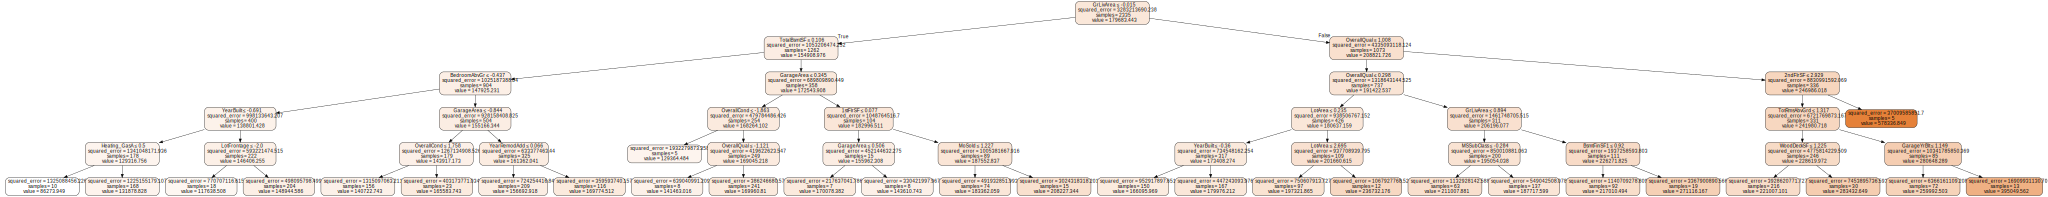

In [22]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model,
                           out_file=None,
                           feature_names=X.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

# Отображаем график
graph


# ✔️ Random Forest Regressor

Random Forest (Случайный лес) — это мощный алгоритм машинного обучения, основанный на **ансамбле решений**. Он объединяет **несколько деревьев решений**, чтобы сделать предсказания более точными и устойчивыми.

### 🔹 Как работает Random Forest?
1. **Создаёт много деревьев решений** на разных случайных поднаборах данных.
2. **Каждое дерево делает своё предсказание**.
3. **Объединяет предсказания** — в задачах классификации выбирается наиболее частый ответ (голосование), а в регрессии усредняются прогнозы.

### 🔹 Почему это работает?
- **Снижает переобучение**: отдельные деревья могут быть нестабильными, но их ансамбль даёт более надёжный результат.
- **Эффективен на сложных данных**: работает с большими наборами признаков и сложными зависимостями.
- **Гибкость**: подходит как для классификации, так и для регрессии.

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2])

Test set evaluation:
_____________________________________
MAE: 29445.34799209259
MSE: 1662328051.8088644
RMSE: 40771.65745721977
R2 Square 0.4995978493485346
__________________________________
Train set evaluation:
_____________________________________
MAE: 10611.208579146534
MSE: 235645837.87149358
RMSE: 15350.760172430992
R2 Square 0.928227078678379
__________________________________


# ✔️ Boosting

Boosting (бустинг) — это другой ансамблевый метод, но он работает **по-другому**. Вместо создания независимых деревьев, бустинг строит модели **последовательно**, каждое новое дерево исправляет ошибки предыдущих.

### 🔹 Как работает Boosting?
1. **Создаётся первое слабое дерево**, которое делает предсказания.
2. **Анализируются ошибки** первой модели, и следующие деревья обучаются на этих ошибках.
3. **Каждое новое дерево корректирует предсказания предыдущих**, улучшая точность модели.
4. **Итоговый прогноз** — это взвешенная сумма всех деревьев.

### 🔹 Почему Boosting так хорош?
- **Обучается на ошибках**: делает модель более точной.
- **Часто превосходит Random Forest** по качеству предсказаний.
- **Популярные реализации**: Gradient Boosting (GBM), XGBoost, LightGBM, CatBoost.



In [24]:
!pip install catboost

In [25]:
from google.colab import output
output.enable_custom_widget_manager()

In [26]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE', random_seed=42) #adjust params if needed
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100, plot=True)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# Create a DataFrame for the results
results_df_2 = pd.DataFrame(data=[["Catboost Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 56266.4276522	test: 56617.2218826	best: 56617.2218826 (0)	total: 64.9ms	remaining: 1m 4s
100:	learn: 33454.1701781	test: 41204.4154249	best: 41204.4154249 (100)	total: 804ms	remaining: 7.16s
200:	learn: 28651.9833919	test: 40724.9214963	best: 40585.4970703 (182)	total: 1.81s	remaining: 7.21s
300:	learn: 25360.5664776	test: 40666.2454358	best: 40585.4970703 (182)	total: 2.74s	remaining: 6.37s
400:	learn: 23135.0028782	test: 40731.0168784	best: 40585.4970703 (182)	total: 4.3s	remaining: 6.42s
500:	learn: 21143.4878474	test: 40921.7638269	best: 40585.4970703 (182)	total: 6s	remaining: 5.98s
600:	learn: 19417.0838181	test: 41054.8636362	best: 40585.4970703 (182)	total: 8.93s	remaining: 5.93s
700:	learn: 18040.0185072	test: 41060.1654087	best: 40585.4970703 (182)	total: 11.8s	remaining: 5.04s
800:	learn: 16833.5068786	test: 41176.3107963	best: 40585.4970703 (182)	total: 13.3s	remaining: 3.31s
900:	learn: 15789.4584743	test: 41264.9791498	best: 40585.4970703 (182)	total: 14.9s	rema

In [27]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,GrLivArea,17.401610
1,OverallQual,9.531083
2,TotalBsmtSF,5.920765
3,LotArea,4.866570
4,BsmtFinSF1,4.287241
...,...,...
300,SaleType_Oth,0.000000
301,SaleType_nan,0.000000
302,SaleCondition_Alloca,0.000000
303,LowQualFinSF,0.000000


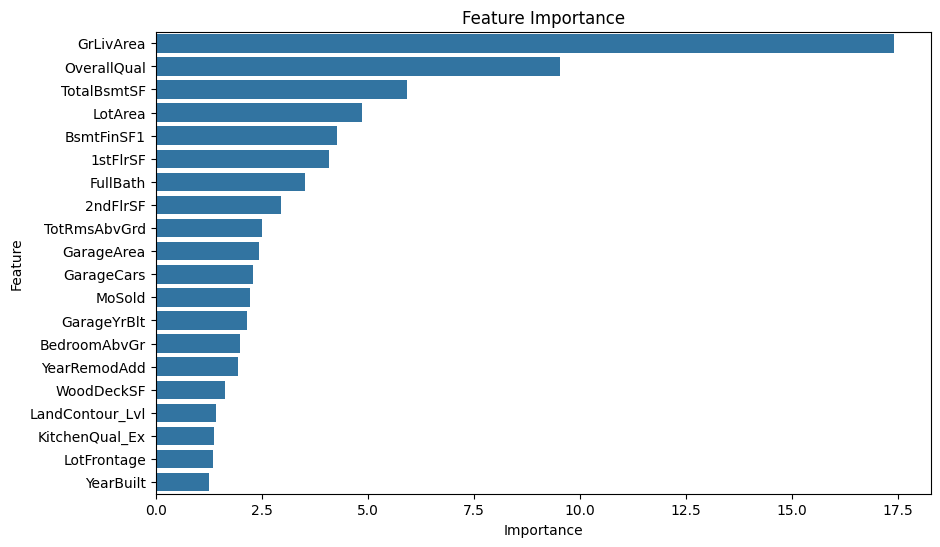

In [28]:
feature_importance = model.get_feature_importance(prettified=True)[:20]

plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [29]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,31485.075613,1.923818e+09,43861.347331,0.420883,0.337056
0,Ridge Regression,29315.690903,1.688273e+09,41088.604904,0.491788,0.387728
0,Lasso Regression,31734.818304,2.036713e+09,45129.957937,0.386899,0.340909
0,Decision Tree,31929.563845,1.999915e+09,44720.409209,0.397976,-0.093049
0,Random Forest Regressor,29445.347992,1.662328e+09,40771.657457,0.499598,0.000000
0,Catboost Regressor,29290.681312,1.647183e+09,40585.497122,0.504157,0.000000


# 📊 Models Comparison

<Axes: ylabel='Model'>

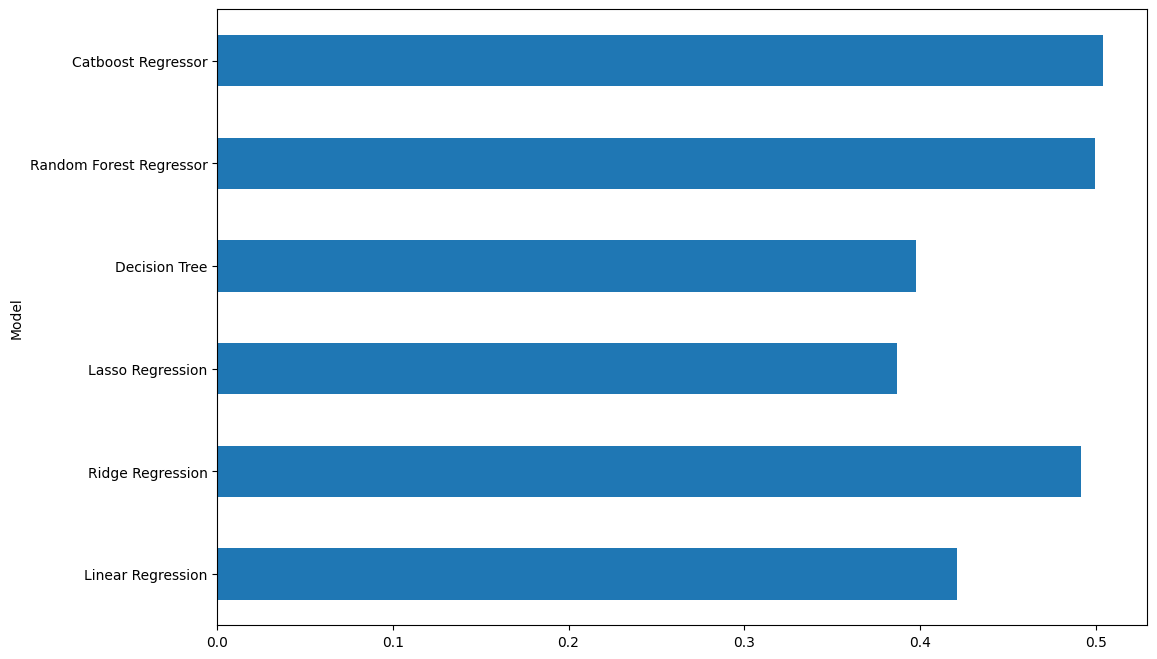

In [30]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

In [31]:
from tqdm import tqdm

def compare_models(models, X_train, X_test, y_train, y_test):

  results = []
  for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, mse, rmse, r2 = evaluate(y_test, y_pred)
    cv_score = cross_val(model)
    results.append([name, mae, mse, rmse, r2, cv_score])

  results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
  results_df.set_index('Model', inplace=True)
  results_df

  return results_df

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    # "Random Forest": RandomForestRegressor(n_estimators=1000),
    "CatBoost": CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE', random_seed=42, verbose=0) # set verbose to 0
}


res = compare_models(models, X_train, X_test, y_train, y_test)
res


 40%|████      | 2/5 [00:01<00:01,  1.61it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1581551282709.4866, tolerance: 766630396.670484
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1331020945314.3713, tolerance: 690913504.070067
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1225843656624.846, tolerance: 586564320.1619194
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_mod

,MAE,MSE,RMSE,R2 Square,Cross Validation
Model,,,,,
Linear Regression,31485.075613,1.923818e+09,43861.347331,0.420883,0.337056
Ridge Regression,29315.690903,1.688273e+09,41088.604904,0.491788,0.449560
Lasso Regression,31734.818304,2.036713e+09,45129.957937,0.386899,0.346703
Decision Tree,31929.563845,1.999915e+09,44720.409209,0.397976,0.267747
CatBoost,29214.377123,1.705617e+09,41299.120086,0.486567,0.432514


#Попробуем поработать с фичами

In [32]:
import numpy as np
# Feature Engineering Ideas for House Prices Dataset


# Example of combining features (add these to your preprocessing steps):

def add_features(df):
  df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
  df['TotalBath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
  df['PorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
  df['QualLivArea'] = df['OverallQual'] * df['GrLivArea']
  df['GarageScore'] = df['GarageCars'] * df['GarageArea']
  return df

# Example Usage after data loading and cleaning:
train_df_features = add_features(df)
test_df_features = add_features(df_test)

In [33]:
y_test = sample.copy()

merged_df_test = pd.merge(test_df_features, y_test, on='Id', how='left')
df_res = pd.concat([merged_df_test, train_df_features])

X = df_res.drop(['Id', 'SalePrice'], axis=1)
y = df_res['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train, X_test = preprocess_data(X_train, X_test)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [ ]:
compare_models(models, X_train, X_test, y_train, y_test)

 40%|████      | 2/5 [00:02<00:02,  1.12it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1583621450282.8787, tolerance: 766630396.670484
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1308886928558.2363, tolerance: 690913504.070067
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1233438478815.016, tolerance: 586564320.1619194
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_mod

# 🔗 Полезные материалы:
- 📘 [Документация Scikit-learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- 📘 [Учебник Яндекса](https://education.yandex.ru/handbook/ml)

